### Funció que et posa les dades xules

In [10]:
import datetime as dt
import pandas as pd

dades = pd.read_excel("consumo_material_clean.xlsx")
        
def ordena_codi_data(dades):

    llista = []

    for dada in dades.itertuples():
        data = dt.datetime.strptime(dada.FECHAPEDIDO, "%d/%m/%y")
        if data.day<10:
            dia = str(0)+str(data.day)
        else:
            dia = str(data.day)
        if data.month<10:
            mes = str(0)+str(data.month)
        else:
            mes = str(data.month)
        data2 = int(str(data.year)+mes+dia)
        llista.append(data2)

    dades['FECHAORD'] = llista

    dades_dates = dades.sort_values('FECHAORD', ascending=True)
    
    dades_guai = dades_dates.sort_values('CODIGO', kind='stable')
    
    del dades_guai['FECHAORD']
    
    return dades_guai

dades_guai = ordena_codi_data(dades)

dades_guai

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO
9367,B40558,19/04/16,445796/16,400505,4,1,9.90,39.60,Compra menor,0-14-32,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15
2655,B40558,06/05/16,491191/16,400505,5,1,9.90,49.50,Compra menor,0-18-109,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15
2657,B40558,06/05/16,491194/16,400505,2,1,9.90,19.80,Compra menor,0-18-62,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15
2656,B40558,06/05/16,491195/16,400505,5,1,9.90,49.50,Compra menor,0-18-105,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15
5757,B40558,12/05/16,506550/16,400505,5,1,9.90,49.50,Compra menor,0-18-108,TRANSITO,GEL P/ LIMPIEZA Y DESCONTAMINACION DE HERIDAS-15
...,...,...,...,...,...,...,...,...,...,...,...,...
11606,F50071,23/06/23,780627/23,421554,10,5,114.95,229.90,Compra menor,0-11-151,TRANSITO,APOSITO DE HIDROFIBRA HIDROCOLOIDE P/ BOMBA DE...
276,F50071,01/08/23,939687/23,421554,5,5,114.95,114.95,Compra menor,0-9-74,TRANSITO,APOSITO DE HIDROFIBRA HIDROCOLOIDE P/ BOMBA DE...
317,F50071,01/09/23,1038634/23,421554,20,5,114.95,459.80,Compra menor,0-11-168,TRANSITO,APOSITO DE HIDROFIBRA HIDROCOLOIDE P/ BOMBA DE...
8698,F50071,17/10/23,1279047/23,421554,10,5,114.95,229.90,Compra menor,0-11-168,TRANSITO,APOSITO DE HIDROFIBRA HIDROCOLOIDE P/ BOMBA DE...


### Intentem fer alguna gràfica

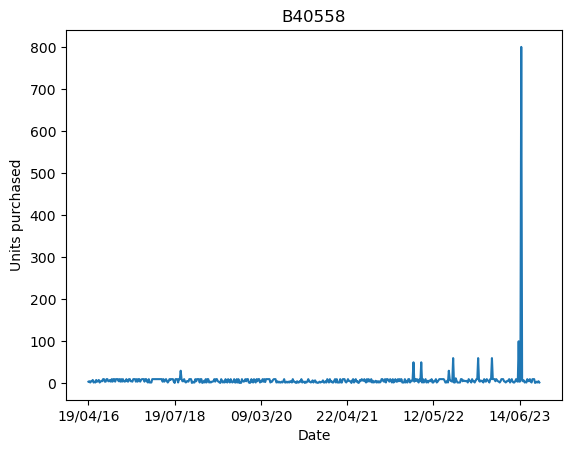

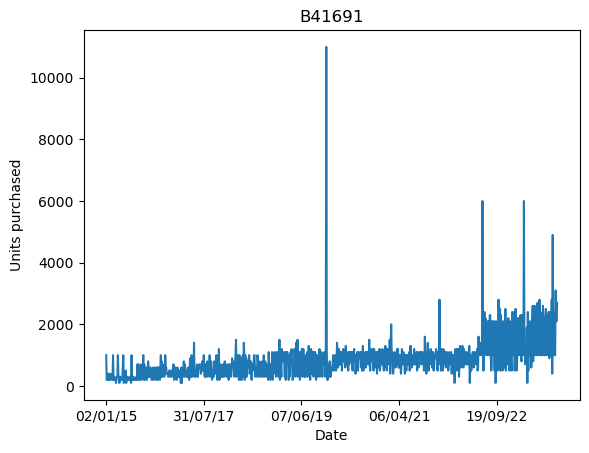

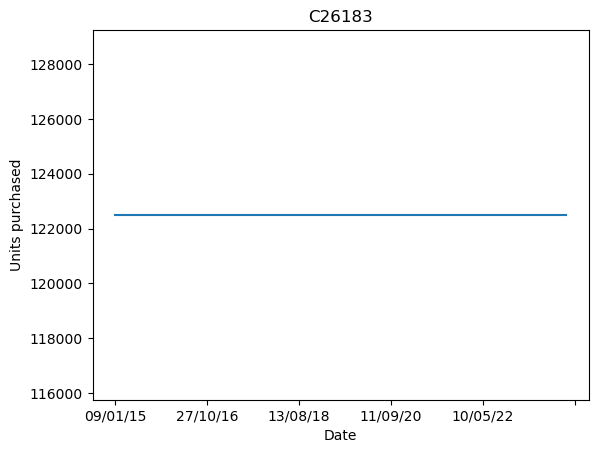

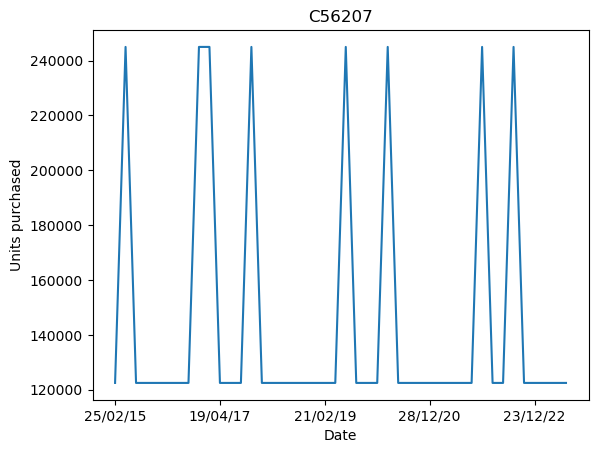

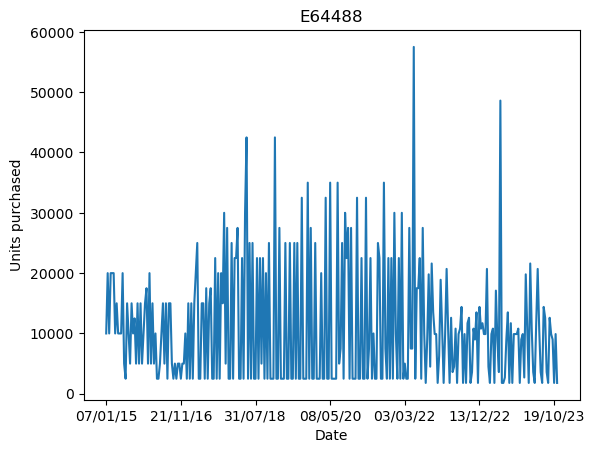

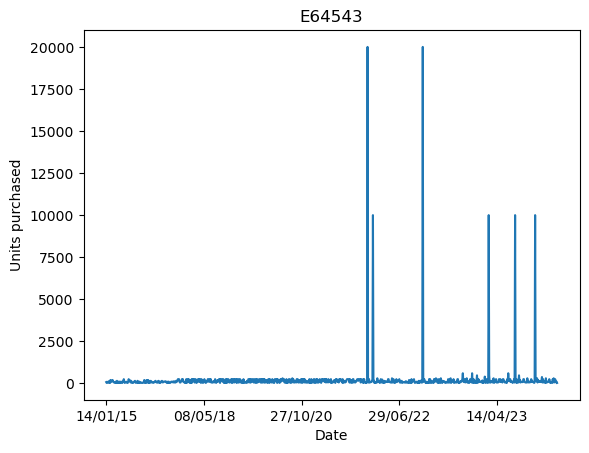

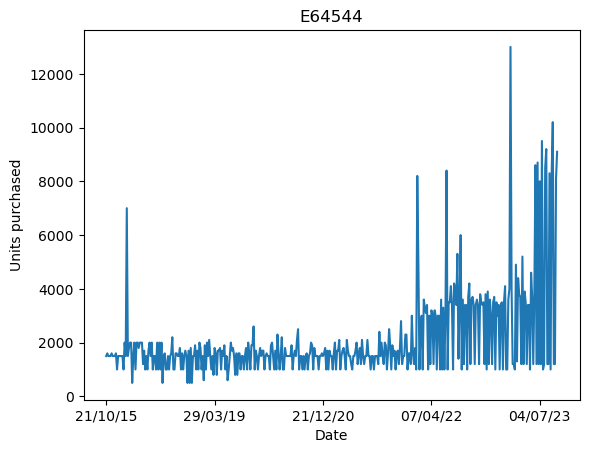

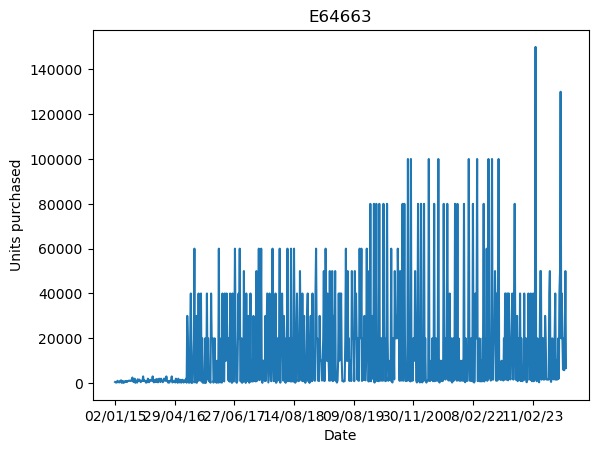

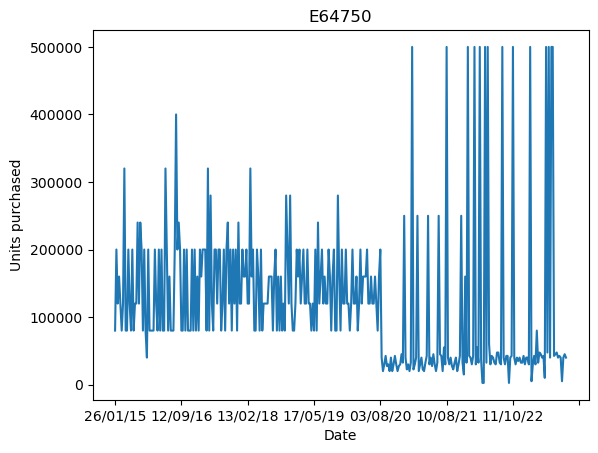

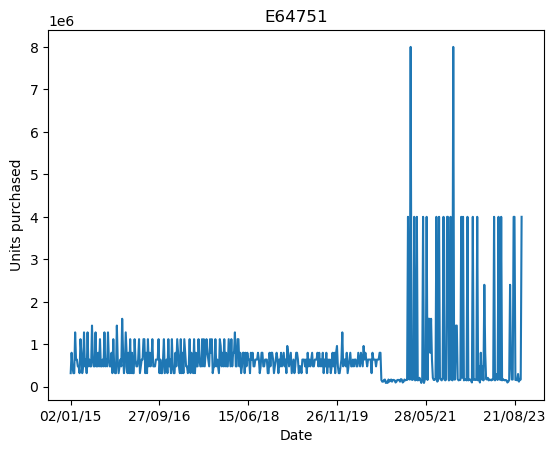

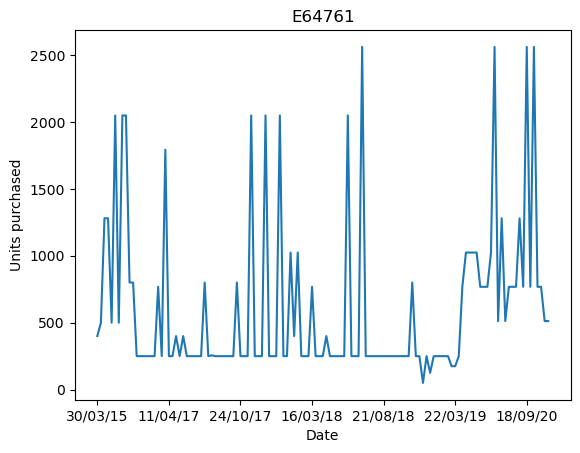

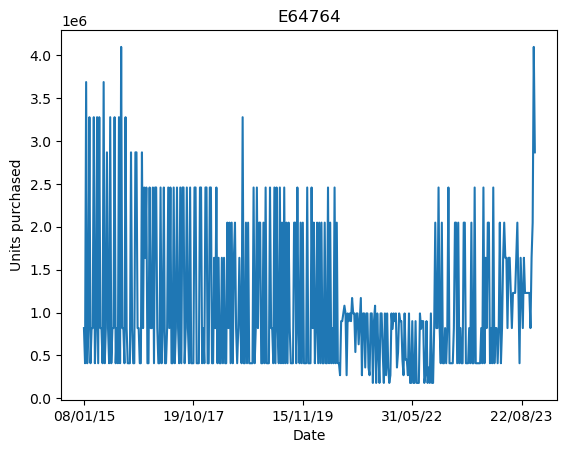

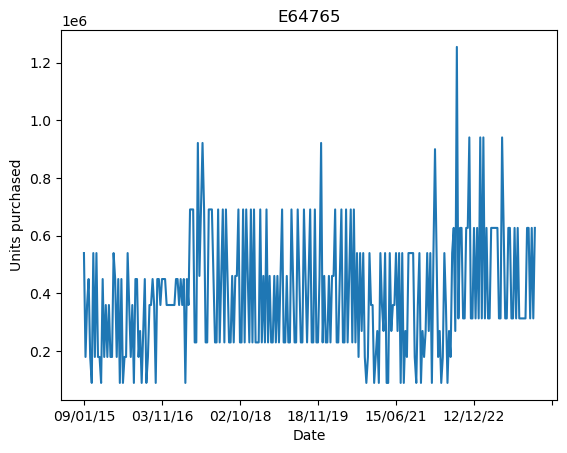

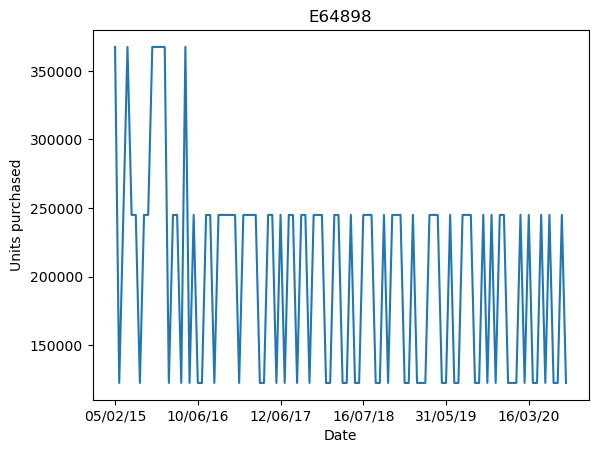

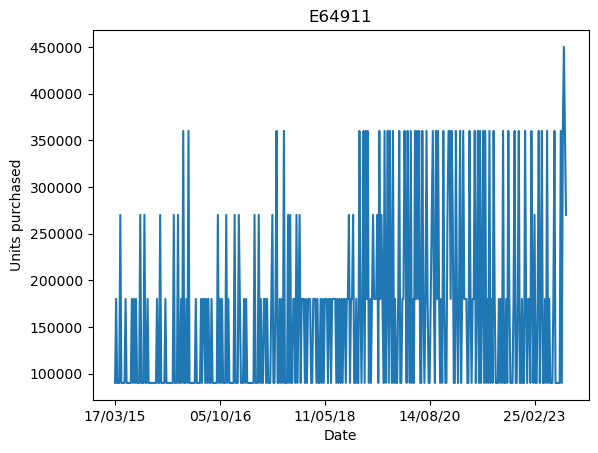

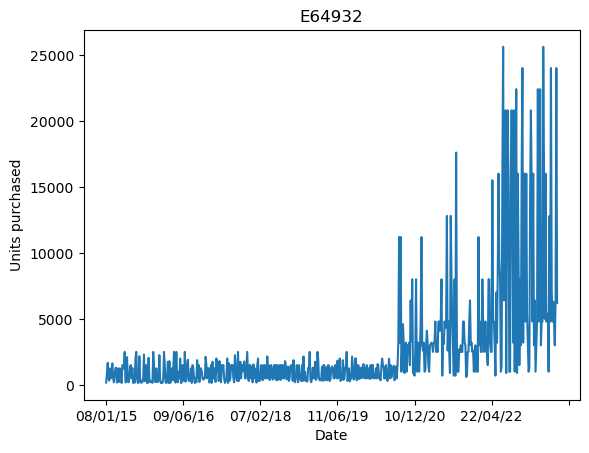

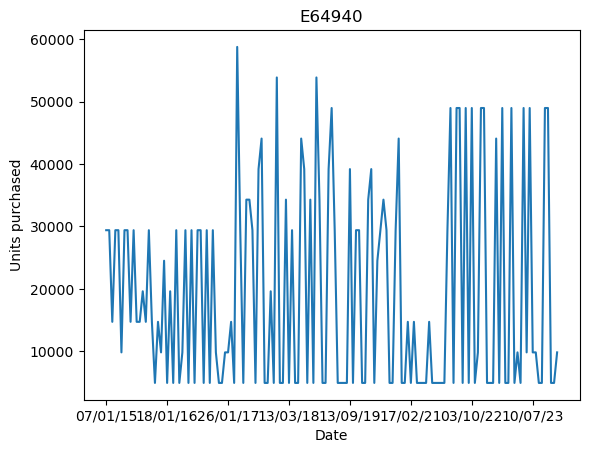

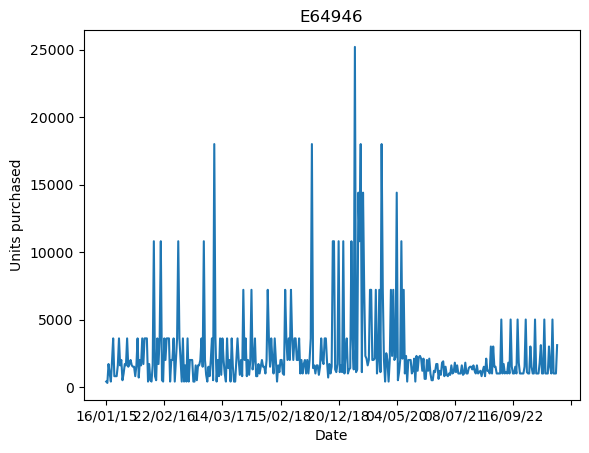

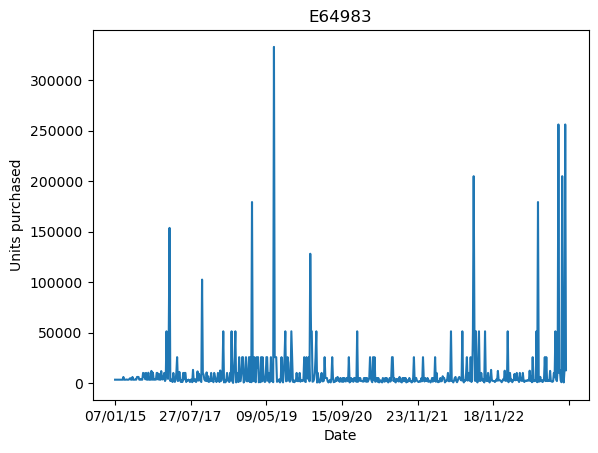

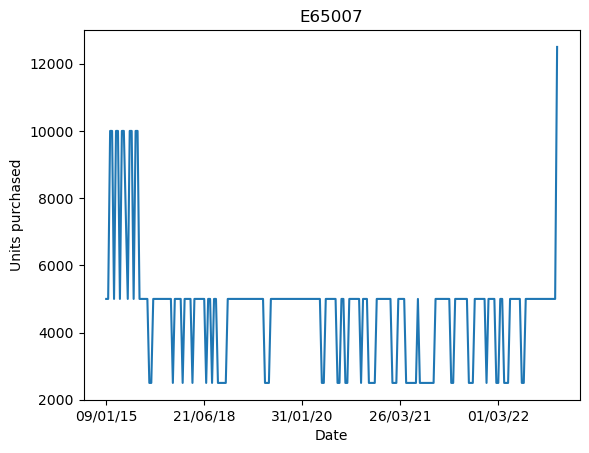

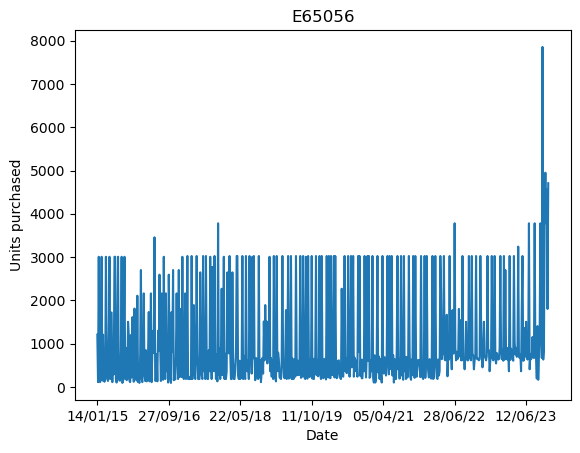

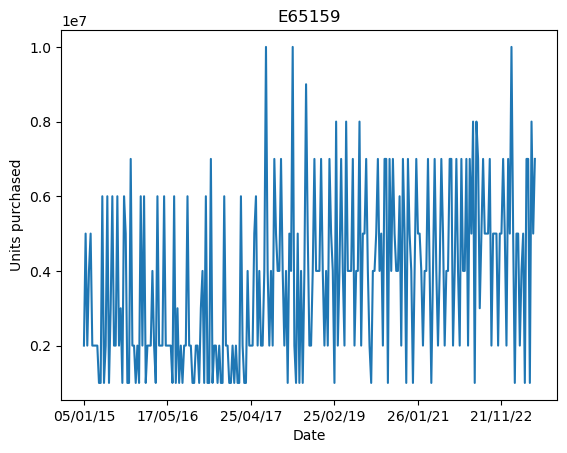

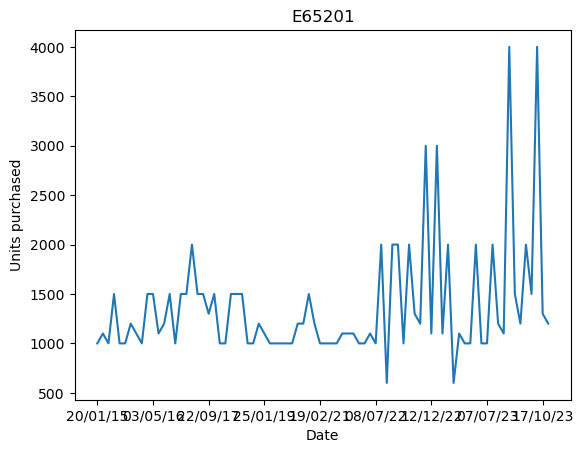

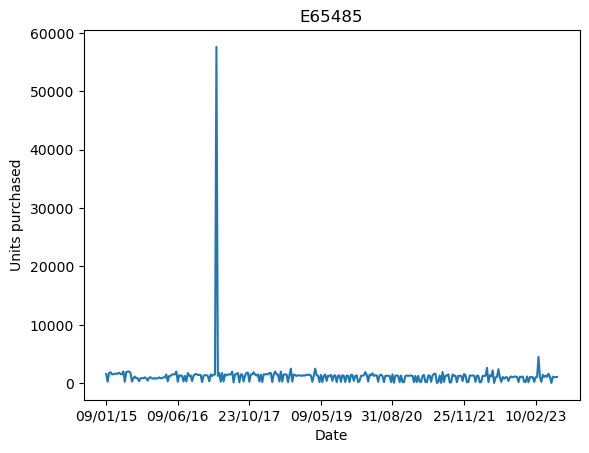

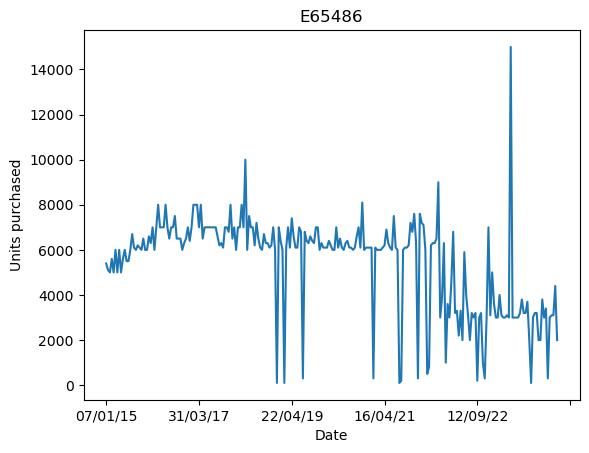

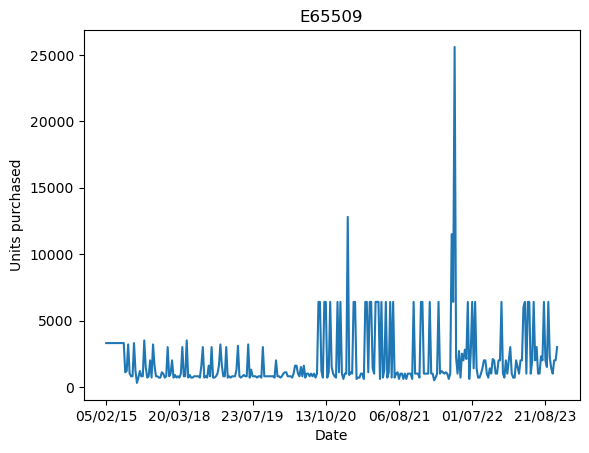

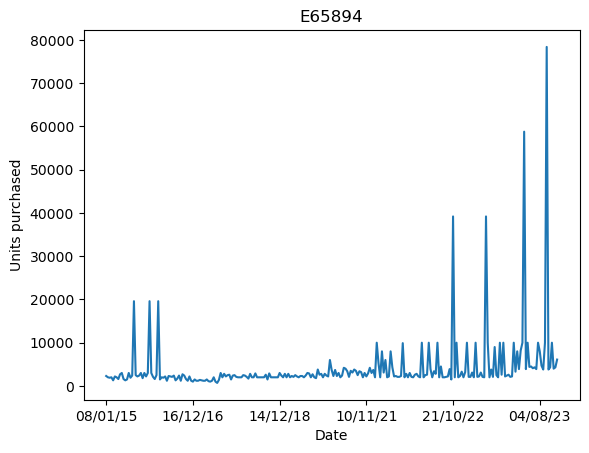

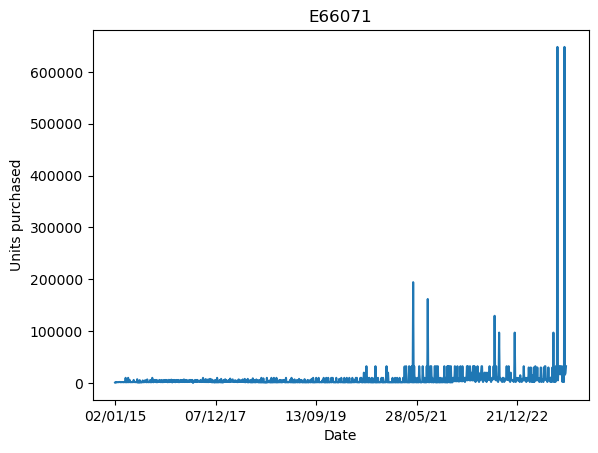

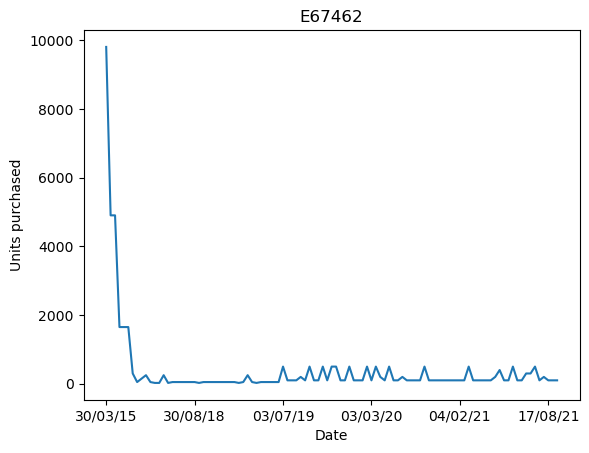

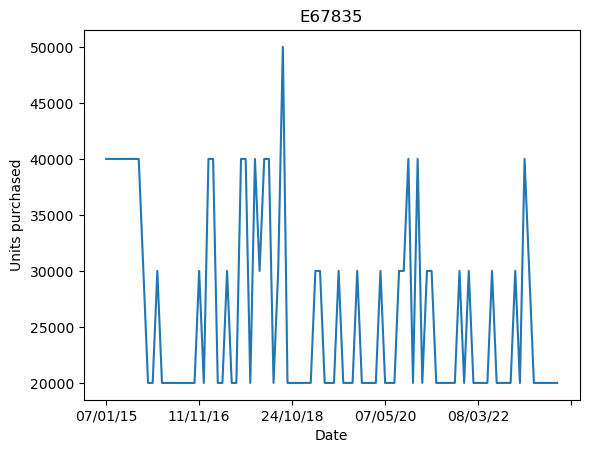

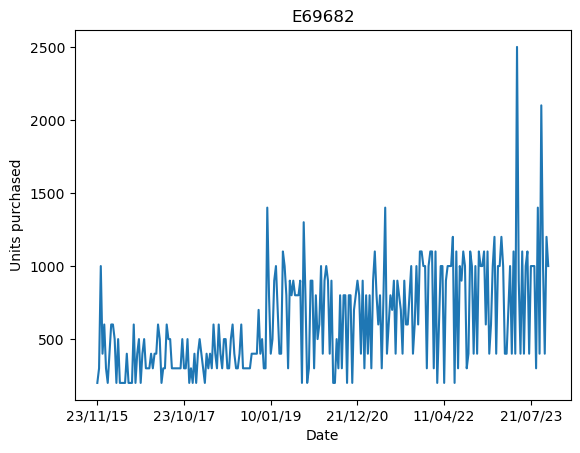

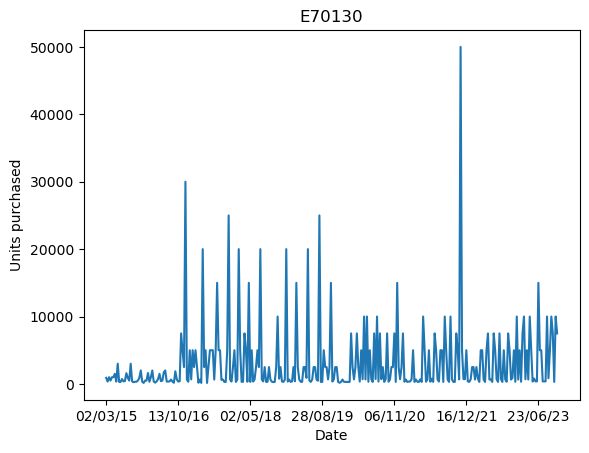

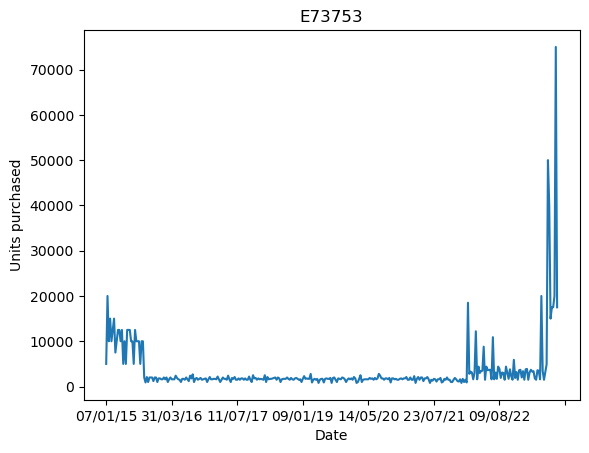

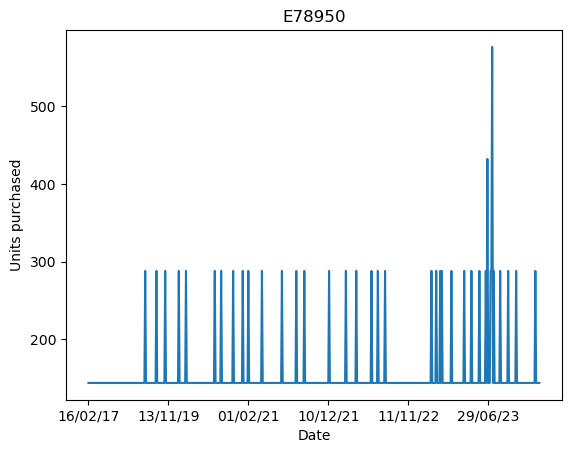

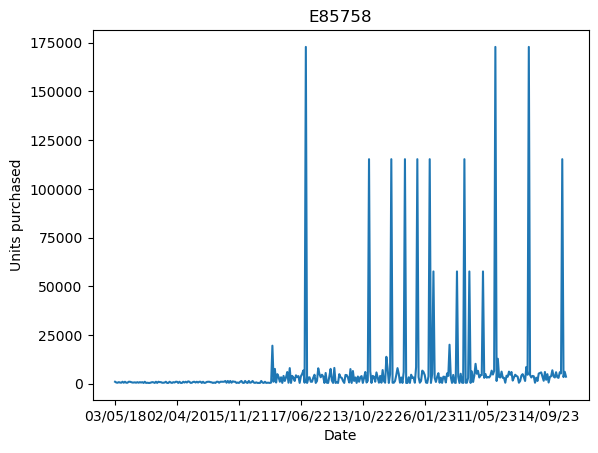

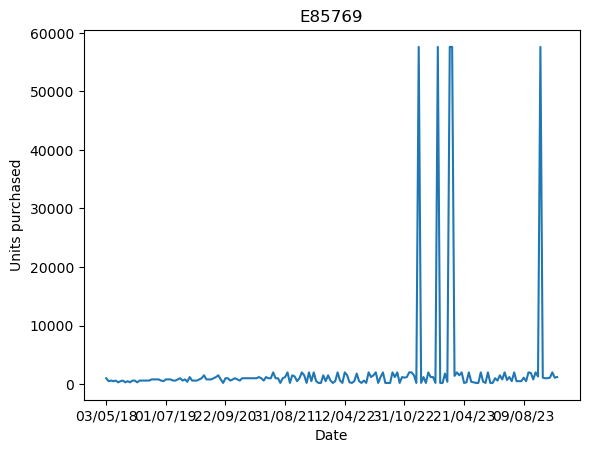

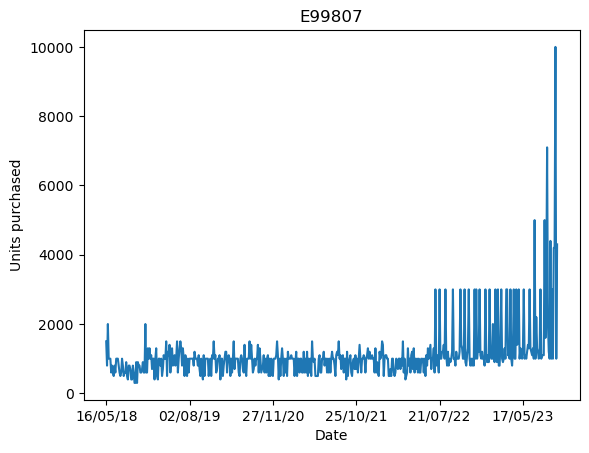

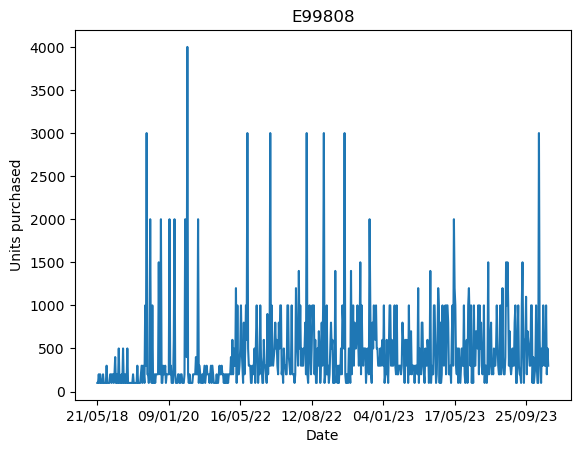

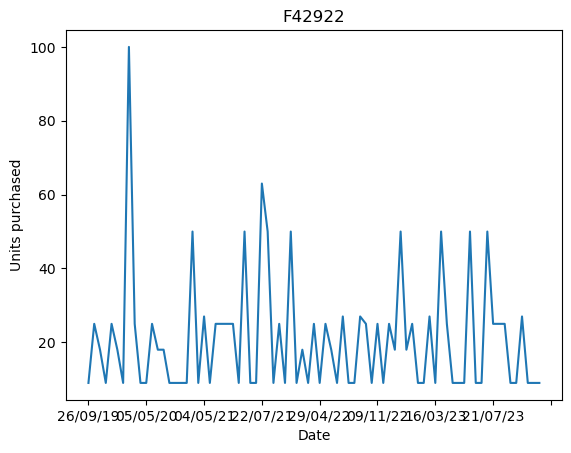

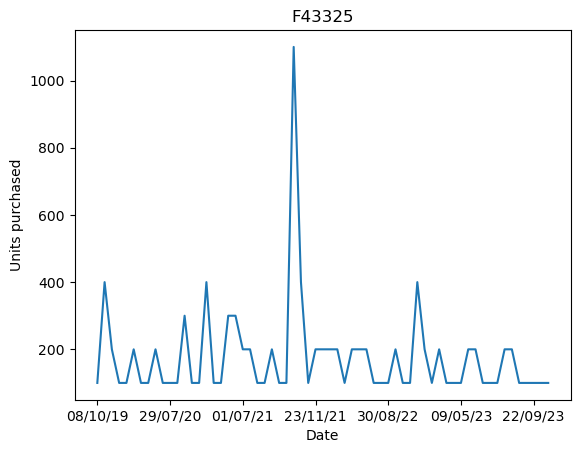

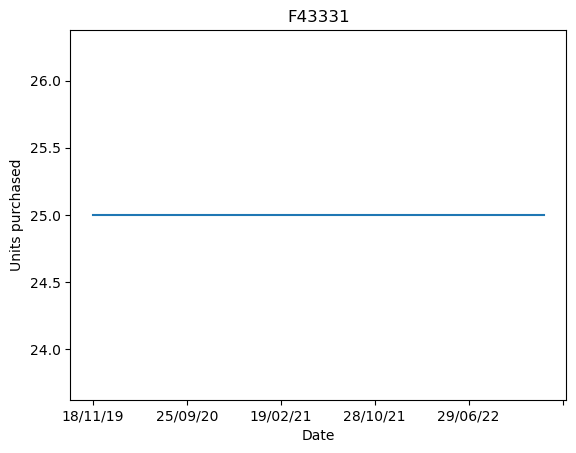

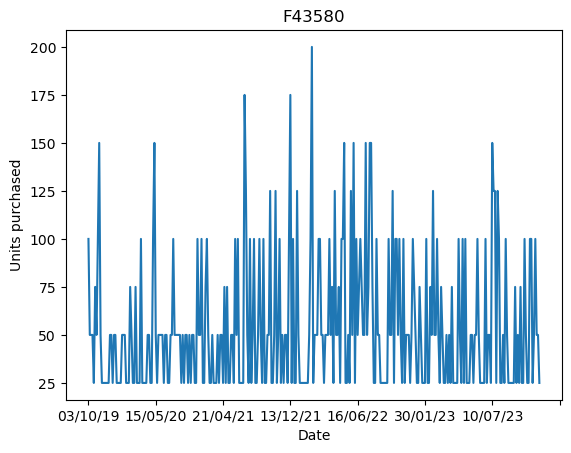

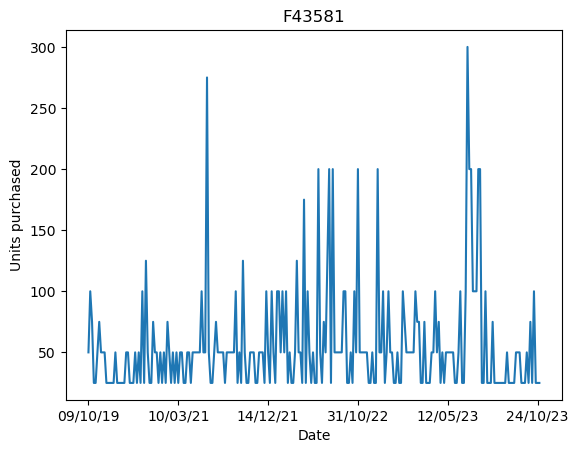

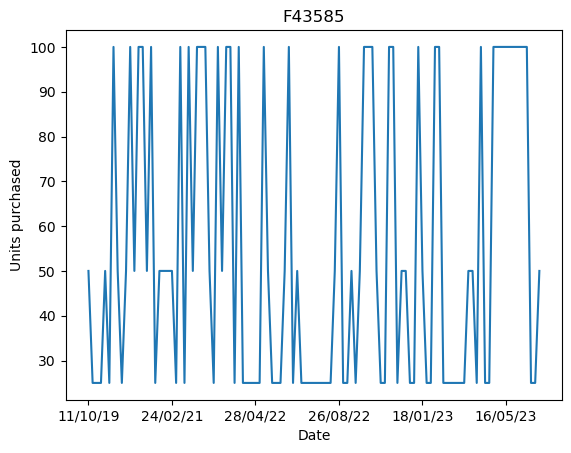

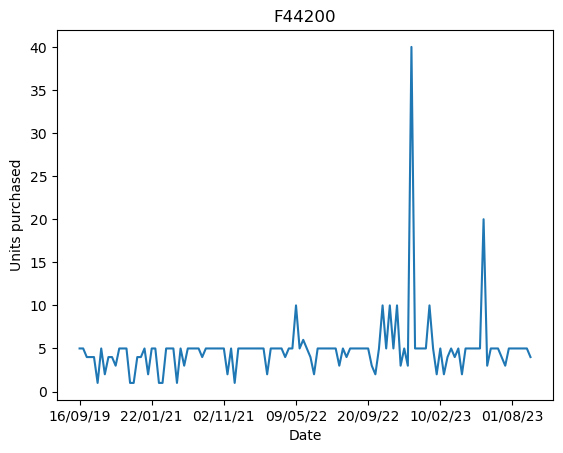

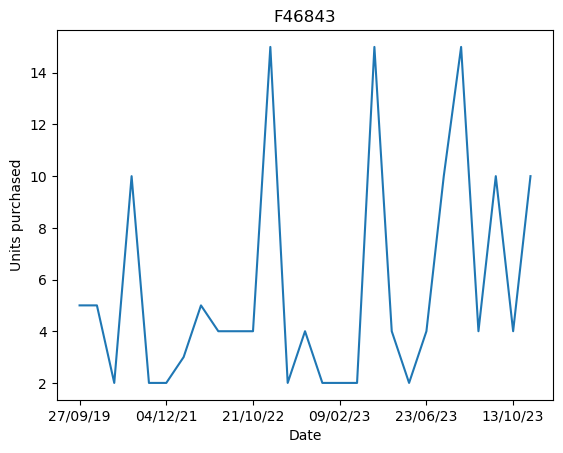

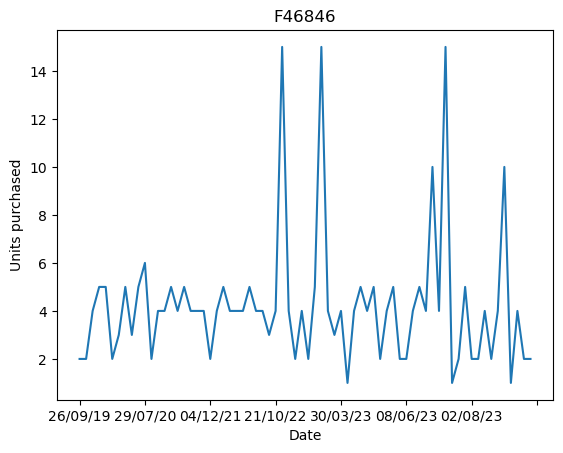

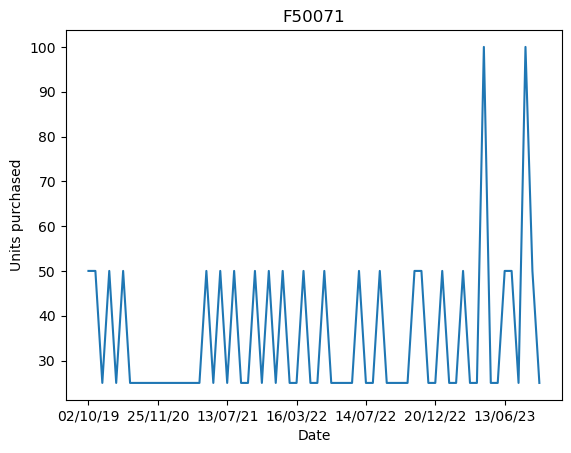

In [3]:
import matplotlib.pyplot as plt
codis = []

for dada in dades_guai.itertuples():
    if dada.CODIGO not in codis:
        codis.append(dada.CODIGO)

for codi in codis:
    producte = dades_guai.loc[dades_guai['CODIGO']==codi]
    producte.set_index('FECHAPEDIDO', inplace=True)
    numero = (producte.CANTIDADCOMPRA)*(producte.UNIDADESCONSUMOCONTENIDAS)
    
    axes = numero.plot()
    
    axes.set_xlabel('Date')
    axes.set_ylabel('Units purchased')
    
    plt.title(codi)
    
    plt.show()

In [11]:
def ordena_data(dades):
    
    llista = []

    for dada in dades.itertuples():
        data = dt.datetime.strptime(dada.FECHAPEDIDO, "%d/%m/%y")
        if data.day<10:
            dia = str(0)+str(data.day)
        else:
            dia = str(data.day)
        if data.month<10:
            mes = str(0)+str(data.month)
        else:
            mes = str(data.month)
        data2 = int(str(data.year)+mes+dia)
        llista.append(data2)

    dades['FECHAORD'] = llista

    dades_dates = dades.sort_values('FECHAORD', ascending=True)
    
    del dades_dates['FECHAORD']
    
    return dades_dates

dades_xules = ordena_data(dades)

dades_xules

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO
410,E64663,02/01/15,1312/15,413568,100,5,29.150000,583.00000,Compra menor,0-0-2,ALMACENABLE,APOSITO DE HIDROFIBRA DE HIDROCOLOIDE C/ PLATA-3
412,E66071,02/01/15,1312/15,420680,100,10,20.900000,209.00000,Compra menor,0-0-2,ALMACENABLE,APOSITO DE HIDROFIBRA DE HIDROCOLOIDE C/ ESPUM...
411,E64751,02/01/15,1301/15,1624W,800,400,58.800000,117.60000,Compra menor,0-0-2,ALMACENABLE,APÓSITO TRANSPARENTE ADHESIVO-24
409,B41691,02/01/15,1292/15,400403,100,10,102.803729,1028.03729,Compra menor,0-0-2,ALMACENABLE,SOLUCION P/ LIMPIEZA Y DESCONTAMINACION DE HER...
1984,E66071,05/01/15,3616/15,420680,160,10,20.900000,334.40000,Compra menor,0-10-1,ALMACENABLE,APOSITO DE HIDROFIBRA DE HIDROCOLOIDE C/ ESPUM...
...,...,...,...,...,...,...,...,...,...,...,...,...
825,E78950,02/11/23,1341720/23,423289,12,12,77.880000,77.88000,Compra menor,0-12-143,TRANSITO,ELIMINADOR DE ADHESIVOS MEDICOS DE LA PIEL-17
827,F46846,02/11/23,1342188/23,66802003,2,1,154.000000,308.00000,Compra menor,0-11-171,TRANSITO,BOMBA DE UN SOLO USO / TERAPIA PRESIÓN NEGATIV...
826,E99808,02/11/23,1338561/23,178567.1,50,10,62.590000,312.95000,Compra menor,0-15-17,TRANSITO,APOSITO DE FIBRAS DE POLIACRILATO C/PLATA-3
824,E64543,02/11/23,1338021/23,403770,5,5,12.100000,12.10000,Compra menor,0-11-113,TRANSITO,APOSITO DE HIDROFIBRA / CINTA-18


In [47]:
def ordena_xulissim(dades):
    
    dades_xules = ordena_codi_data(dades)
    
    return dades_xules.sort_values('ORIGEN', ascending=True, kind='stable')

dades_xules = ordena_xulissim(dades)

dades_xules

,CODIGO,FECHAPEDIDO,NUMERO,REFERENCIA,CANTIDADCOMPRA,UNIDADESCONSUMOCONTENIDAS,PRECIO,IMPORTELINEA,TIPOCOMPRA,ORIGEN,TGL,PRODUCTO
435,E64761,02/02/17,91013/17,265868.4,50,5,13.497,134.970,Compra menor,0-0-13,TRANSITO,APOSITO DE HIDROCOLOIDE C/ PLATA-2
55,E64761,01/03/17,162355/17,265868.4,50,5,13.497,134.970,Compra menor,0-0-13,TRANSITO,APOSITO DE HIDROCOLOIDE C/ PLATA-2
13498,E64761,27/03/17,230247/17,265868.4,50,5,13.497,134.970,Compra menor,0-0-13,TRANSITO,APOSITO DE HIDROCOLOIDE C/ PLATA-2
10370,E64761,21/04/17,300850/17,265868.4,50,5,13.497,134.970,Compra menor,0-0-13,TRANSITO,APOSITO DE HIDROCOLOIDE C/ PLATA-2
540,E64761,02/05/17,325670/17,265868.4,50,5,13.497,134.970,Compra menor,0-0-13,TRANSITO,APOSITO DE HIDROCOLOIDE C/ PLATA-2
...,...,...,...,...,...,...,...,...,...,...,...,...
4550,F43580,10/01/20,34775/20,409729,5,5,324.148,324.148,Compra menor,1-2-79,TRANSITO,EQ. DE PRESION NEGATIVA / Espuma de poliuretan...
9749,F43580,20/01/21,74001/21,409729,10,5,324.148,648.296,Compra menor,1-2-79,TRANSITO,EQ. DE PRESION NEGATIVA / Espuma de poliuretan...
5057,F43580,11/01/22,22701/22,409729,10,5,324.148,648.296,Compra menor,1-2-79,TRANSITO,EQ. DE PRESION NEGATIVA / Espuma de poliuretan...
10310,F43580,21/02/22,200601/22,409729,10,5,324.148,648.296,Compra menor,1-2-79,TRANSITO,EQ. DE PRESION NEGATIVA / Espuma de poliuretan...


In [83]:
def compta_dies(dades):
    
    noms_hosp = []
    array=[]
    flag = True

    for dada in dades_xules.itertuples():
        if dada.ORIGEN not in noms_hosp:
            noms_hosp.append(dada.ORIGEN)

    temps_num = [[],[]]
    dies = []
    dies2 = []

    for nom in noms_hosp:
        dades_departament = dades_xules.loc[dades_xules['ORIGEN']==nom]
        codis_departament = []
        llista = []
        llista2 = []
        for dada in dades_departament.itertuples():
            if dada.CODIGO not in codis_departament:
                codis_departament.append(dada.CODIGO)
        for codi in codis_departament:
            dades_departament_producte = dades_departament.loc[dades_departament['CODIGO']==codi]
            llisteta = []
            llisteta2 = []
            j=0
            for dada in dades_departament_producte.itertuples():
                if j==0:
                    data0 = dt.datetime.strptime(dada.FECHAPEDIDO, "%d/%m/%y")
                    j+=1
                else:
                    llisteta2.append((dada.UNIDADESCONSUMOCONTENIDAS)*(dada.CANTIDADCOMPRA))
                    data1 = dt.datetime.strptime(dada.FECHAPEDIDO, "%d/%m/%y")
                    resta = data1-data0
                    llisteta.append(int(resta.days))
                    data0 = data1
            llista.append([nom, codi, llisteta])
            llista2.append(llisteta2)
        dies.append(llista)
        dies2.append(llista2)
        
    return [dies, dies2]